# **Projet P6 - révisions et pratique**

Vous allez travailler sur des données extraites de IMDB. Cela vous permettra si vous les souhaitez (plus tard!) d'inclure ce travail à votre projet TheMoviePredictor que vous faites avec Arnaud dans lequel vous récupérez justement ces données et construisez votre base. La variable d'intérêt sera la notation IMDB des films pour pouvoir déterminer. En effet le succès commercial d'un film n'implique pas nécessairement sa qualité et il convient donc d'aller chercher plus loin que le simple profit dégagé d'une production cinématographique...
À vous !!

Les **objectifs** de ce projet sont multiples :
1. Réviser
2. Pratiquer
3. Vous auto-évaluer et vous évaluer (pour nous)
4. Vous rassurer et vous permettre de réaliser ce que vous savez faire pour pouvoir en parler

## **1. Import des libraries**

**À FAIRE**

> Importer dans la cellule l'ensemble des librairies nécessaires à votre travail. L'idée n'est pas de savoir immédiatement tout ce dont vous aurez besoin mais de faire des aller-retours pour y ajouter vos librairies petit à petit. L'intérêt est une meilleure lisibilité pour un lecteur extérieur qui, en quelques lignes d'import, pourra déjà avoir une idée de ce qui a été fait.

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

## **2. Import des données**

**À FAIRE**

> Importer les données `5000_movies.csv` disponible à la racine de ce document.  
> Afficher les 7 premières lignes et **toutes** les colonnes.    
> Répondre aux questions suivantes (répondez à toutes les questions dans une seule cellule Markdown mais évidemment le code vous ayant permis d'extraire ces informations doit être présent):
>- combien y a-t-il d'observations/de variables ?
>- sur combien d'années se répartissent les données ?
>- combien de pays sont représentés ?
>- combien de réalisateurs différents dans la base ?
>- combien d'acteurs et d'actrices différentes ?

In [316]:
data = pd.read_csv('5000_movies_bis.csv')
data.head(7)

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


In [317]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_fb_likes', 'actor_3_fb_likes', 'actor_2_name',
       'actor_1_fb_likes', 'gross', 'genres', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_fb_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_fb_likes', 'imdb_score',
       'aspect_ratio', 'movie_fb_likes'],
      dtype='object')

In [318]:
print(f'obs, col : ', data.shape)
print(f'année unique : ', data.title_year.unique().shape)
print(f'Pays : ', data.country.unique().shape)
print(f'Réal : ', data.director_name.unique().shape)

actors = [data['actor_1_name'],data['actor_2_name'], data['actor_3_name']]
act = pd.concat(actors)
print(f"Nombre d'acteurs", act.unique().shape)

obs, col :  (5043, 28)
année unique :  (92,)
Pays :  (66,)
Réal :  (2399,)
Nombre d'acteurs (6256,)


Réponses:  
>Il y a 5043 observations pour 28 variables. 
Les données sont réparties sur 91 années.  
Il y a 65 pays représentés.  
2398 réalisateurs présents dans la base.  
6255 Acteurs et actrices sont présents dans la base.  


## **3. Nettoyage des données**

**À FAIRE**

> Vous allez dans cette partie vous occuper de faire les opérations de nettoyage sur les données. Cela implique donc de regarder en détail :
>- les doublons
>- les variables (à supprimer, à modifier etc...)
>- les valeurs manquantes
>- les zéros
> 
>Ajouter une courte explication des décisions que vous prendrez (gestion des valeurs manquantes, suppression ou modification de certaines variables, etc...).

In [319]:
data.describe()

,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_1_fb_likes,gross,num_voted_users,cast_total_fb_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.577000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.640000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.522261e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.938647e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.652850e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.041819e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.130000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,3.792188e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.178443e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,5.749100e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.400000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [320]:
# Suppression des doublons
data.drop_duplicates(inplace = True)

In [321]:
# Analyse des colonnes et des NaN 
data.isna().sum()

color                      19
director_name             103
num_critic_for_reviews     49
duration                   15
director_fb_likes         103
actor_3_fb_likes           23
actor_2_name               13
actor_1_fb_likes            7
gross                     462
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
cast_total_fb_likes         0
actor_3_name               23
facenumber_in_poster       13
plot_keywords             152
movie_imdb_link             0
num_user_for_reviews       21
language                   12
country                     5
content_rating            301
budget                    398
title_year                107
actor_2_fb_likes           13
imdb_score                  0
aspect_ratio              327
movie_fb_likes              0
dtype: int64

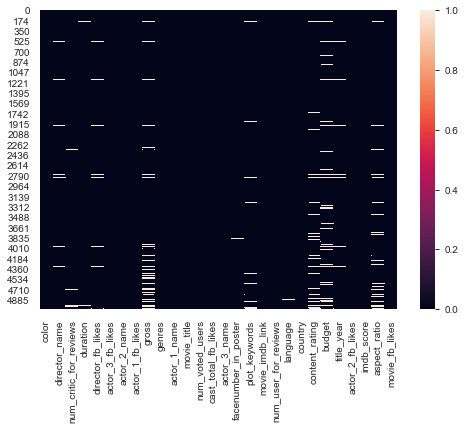

In [322]:
sns.heatmap(data.isna());

In [323]:
# Aperçu des 10 meilleurs scores du dataset
data.nlargest(10, 'imdb_score')

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
2765,Color,John Blanchard,NaN,65.0,0.0,176.0,Andrea Martin,770.0,NaN,Comedy,...,NaN,English,Canada,NaN,NaN,NaN,179.0,9.5,1.33,0
1937,Color,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28341469.0,Crime|Drama,...,4144.0,English,USA,R,25000000.0,1994.0,745.0,9.3,1.85,108000
3466,Color,Francis Ford Coppola,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,134821952.0,Crime|Drama,...,2238.0,English,USA,R,6000000.0,1972.0,10000.0,9.2,1.85,43000
2824,Color,NaN,53.0,55.0,NaN,2.0,Olaf Lubaszenko,20.0,447093.0,Drama,...,37.0,Polish,Poland,TV-MA,NaN,NaN,3.0,9.1,1.33,0
3207,Color,NaN,53.0,55.0,NaN,2.0,Olaf Lubaszenko,20.0,447093.0,Drama,...,37.0,Polish,Poland,TV-MA,NaN,NaN,3.0,9.1,1.33,0
4409,NaN,John Stockwell,2.0,90.0,134.0,354.0,T.J. Storm,260000.0,287779.0,Action,...,1.0,NaN,USA,NaN,17000000.0,2016.0,454.0,9.1,NaN,0
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,...,4667.0,English,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000
2837,Color,Francis Ford Coppola,149.0,220.0,0.0,3000.0,Al Pacino,22000.0,57300000.0,Crime|Drama,...,650.0,English,USA,R,13000000.0,1974.0,14000.0,9.0,1.85,14000
3481,Color,NaN,54.0,53.0,NaN,1000.0,Adam Goldberg,4000.0,NaN,Crime|Drama|Thriller,...,173.0,English,USA,TV-MA,NaN,NaN,1000.0,9.0,1.78,61000
339,Color,Peter Jackson,328.0,192.0,0.0,416.0,Billy Boyd,5000.0,377019252.0,Action|Adventure|Drama|Fantasy,...,3189.0,English,USA,PG-13,94000000.0,2003.0,857.0,8.9,2.35,16000


In [324]:
data.dropna(inplace = True)

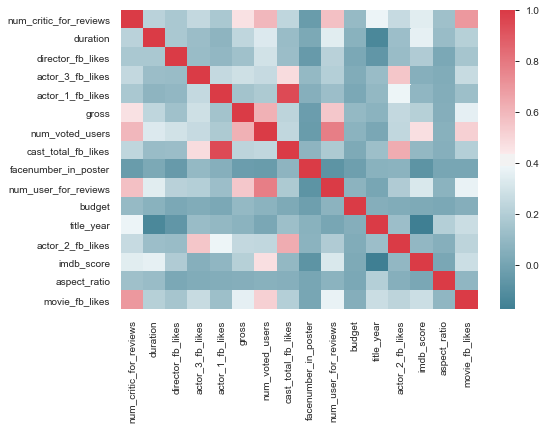

In [325]:
palette = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(), cmap = palette);

La matrice de corrélation ci-dessus nous indique que certaines variables n'ont pas d'impact sur la variable 'imdb_score'  
Je vais donc supprimer les colonnes :
> - aspect_ratio  
> - facenumber_in_poster  
Je retire également les colonnes movie_imdb_link

In [326]:
data.drop(['aspect_ratio', 'movie_imdb_link', 'facenumber_in_poster', ], axis = 1, inplace= True)

## **4. Analyse exploratoire**

**À FAIRE**

>Dans cette partie, vous devez "explorer" vos données et les visualiser. Cette tâche, qui peut s'avérer très vaste, consiste à s'intéresser à l'information contenue dans nos données "au premier abord".
>
>Sont donc attendus dans cette partie :
>- quelques statistiques descriptives
>- entre 6 et 10 visualisations (vous pouvez bien sûr en regrouper plusieurs sur une même figure)
>- et pour chaque résultat/graphique présenté, une explication succinte

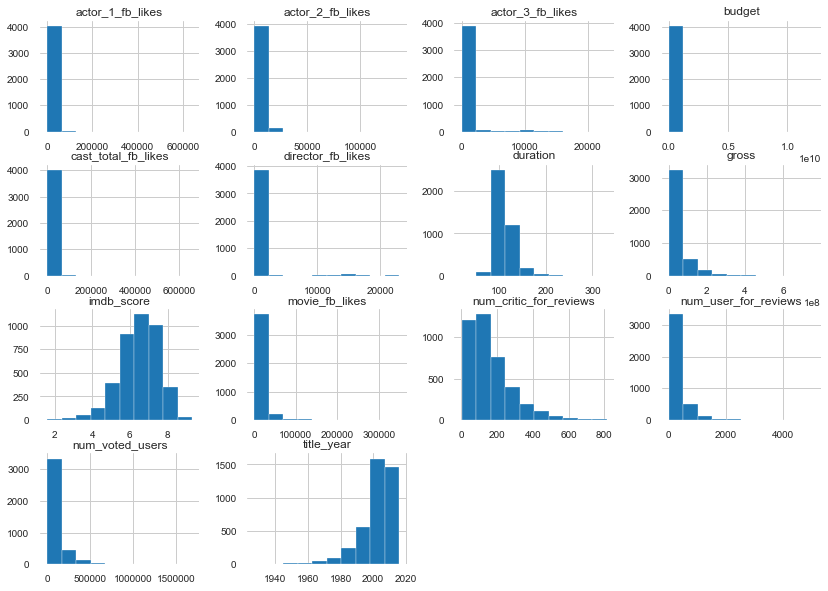

In [327]:
data.hist(figsize=(14,10));

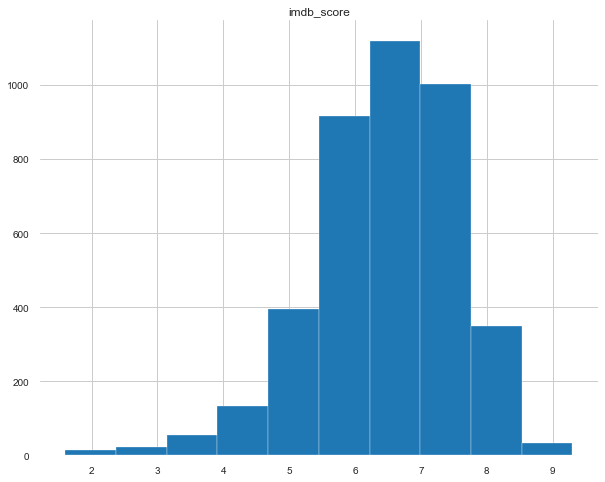

In [328]:
data.hist('imdb_score', figsize=(10,8));

## **5. Pré-traitement**

**À FAIRE**

>Maintenant que vous commencez à bien connaître votre base de données, on va la préparer pour la partie modélisation.
>
>Sont donc attendus dans cette partie :
>- restriction aux données utiles à la prédiction : potentiellement certaines variables conservées pour la visualisation sont à supprimer pour la modélisation
>- création des échantillons d'entraînement et de test
>- gestion des variables catégoriques d'un côté et numériques de l'autre
>
>La standardisation n'étant pas toujours nécessaire puisque ça dépend des modèles, vous pouvez choisir de la faire dès maintenant ou bien d'attendre de voir si vous en avez besoin...

In [329]:
cat = ['color', 'director_name', 'actor_2_name','genres', 'actor_1_name', 'movie_title',
       'actor_3_name', 'plot_keywords', 'language', 'country',
       'content_rating']
movies = pd.get_dummies(data, cat, drop_first= True)

In [330]:
movies.head()

,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_1_fb_likes,gross,num_voted_users,cast_total_fb_likes,num_user_for_reviews,budget,...,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_TV-14,content_rating_Unrated,content_rating_X
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,...,0,0,0,0,1,0,0,0,0,0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,...,0,0,0,0,1,0,0,0,0,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,...,0,0,0,0,1,0,0,0,0,0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,...,0,0,0,0,1,0,0,0,0,0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,...,0,0,0,0,1,0,0,0,0,0


In [331]:
X = movies.drop(['imdb_score'], axis = 1)
y = movies.imdb_score

In [332]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [344]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xtrain_sc = sc.fit_transform(X_train)
Xtest_sc = sc.fit_transform(X_test)

In [346]:
from sklearn.decomposition import PCA

pca = PCA(0.75).fit(Xtrain_sc)
pca_train = pca.transform(Xtrain_sc)
pca_test = PCA(0.75).fit(Xtest_sc)

In [347]:
print(pca.n_components_)
print(pca.explained_variance_ratio_)

1922
[0.00071419 0.00065719 0.00064587 ... 0.0002959  0.00029586 0.00029573]


## **6. Une régression linéaire**

**À FAIRE**

>Tout est dans le titre. Vous devez ici entraîner et tester une régression linéaire pour la prédiction de la note IMDB.  
>Par ailleurs, sont attendus ici :
>- un affichage et une interprétation des coefficients et de leur significativité
>- le choix d'une mesure d'évaluation du modèle et son interprétation
>- une validation croisée pour l'estimation de la qualité du modèle
>- *facultatif : l'ajout d'une régularisation Ridge ou Lasso pour déterminer si les résultats sont meilleurs*

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [337]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import datetime
import time
from time import strftime
from time import gmtime

models = {'KNN' : KNeighborsClassifier(n_neighbors = 10),
          'KMeans' : KMeans(n_clusters = 34),
          #'SVM':SVC(gamma=0.01),
          'RandomForest' : RandomForestClassifier(),
          'DecisionTree' : DecisionTreeClassifier()
         }

model_list = []
runtime_list = []
scor_list = []

for k, v in models.items() :
    
    t0 = time.time() 
    model = v
    model.fit(pca_train, y_train)
    runtime = time.time() - t0    

    model_list.append(k)
    runtime_list.append(strftime("%H:%M:%S", gmtime(runtime)))

    # Score
    scor = model.score(pca_test, y_test)
    scor_list.append(round(scor, 2))
    print(f"Le modèle {k} s'est terminé en {runtime} pour {round(scor, 2)}")

ValueError: Expected 2D array, got scalar array instead:
array=PCA(copy=True, iterated_power='auto', n_components=0.75, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False).
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from time import strftime
from time import gmtime

model = ['Regression Logistique sans PCA', 'Regression Logistique avec PCA']
scores = [lg_score, lg_pca_score]
runtimes = [strftime("%H:%M:%S", gmtime(lg_runtime)), strftime("%H:%M:%S", gmtime(lg_pca_runtime))]

models_list = model + model_list
scoring = scores + scor_list
run_list = runtimes + runtime_list

result = pd.DataFrame({'Model ' : models_list, 'Run time' : run_list, 'Score' : scoring})
result

## **7. Un autre modèle de régression**

**À FAIRE**

>Tout est encore dans le titre. Mettez en place le modèle **de régression** que vous souhaitez.  
>Sont donc attendus dans cette partie :
>- une petite phrase pour justifier votre choix
>- les pré-traitements supplémentaires nécessaires s'il y en a
>- évaluation du modèle avec `cross_val_score`
>- affinage des éventuels hyperparamètres avec `GridSearchCV`

## **8. De la régression à la classification**

**À FAIRE**

>Transformez le problème de régression en un problème de classification par une discrétisation du score IMDB en 5 classes : nul, bof, sympa, bon, super.  
>Justifiez votre découpage en indiquant quels seuils vous avez utilisé et pourquoi.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import datetime

models = {'KNN' : KNeighborsClassifier(n_neighbors = 10),
          'KMeans' : KMeans(n_clusters = 34),
          #'SVM':SVC(gamma=0.01),
          'RandomForest' : RandomForestClassifier(),
          'DecisionTree' : DecisionTreeClassifier()
         }

model_list = []
runtime_list = []
scor_list = []

for k, v in models.items() :
    
    t0 = time.time() 
    model = v
    model.fit(X_train_pca, y_train)
    runtime = time.time() - t0    

    model_list.append(k)
    runtime_list.append(strftime("%H:%M:%S", gmtime(runtime)))

    # Score
    scor = model.score(X_test_pca, y_test)
    scor_list.append(round(scor, 2))
    print(f"Le modèle {k} s'est terminé en {runtime} pour {round(scor, 2)}")

In [ ]:
from time import strftime
from time import gmtime

model = ['Regression Logistique sans PCA', 'Regression Logistique avec PCA']
scores = [lg_score, lg_pca_score]
runtimes = [strftime("%H:%M:%S", gmtime(lg_runtime)), strftime("%H:%M:%S", gmtime(lg_pca_runtime))]

models_list = model + model_list
scoring = scores + scor_list
run_list = runtimes + runtime_list

result = pd.DataFrame({'Model ' : models_list, 'Run time' : run_list, 'Score' : scoring})
result

## **9. Une régression logistique**

**À FAIRE**

>Vous devez ici entraîner et tester une régression logistique pour la prédiction de la classe du film.  
>Par ailleurs, sont attendus ici :
>- un affichage et une interprétation des *Odds-ratio* et de leur significativité
>- le choix d'une ou plusieurs mesures d'évaluation du modèle et leur interprétation
>- une validation croisée pour l'évaluation modèle
>- l'affinage des hyperparamètres avec l'outil qui va bien
>- peut-on tracer les courbes ROC et calculer l'AUC ? Pourquoi ?

## **10. Un autre modèle de classification**

**À FAIRE**

>Au choix, une autre méthode de classification. Évidemment, sentez-vous libre d'en essayer plus d'une et de les comparer.  
>Sont donc attendus dans cette partie :
>- une petite phrase pour justifier votre choix
>- les pré-traitements supplémentaires nécessaires s'il y en a
>- évaluation du modèle
>- étude de l'importance des paramètres, si votre modèle le permet
>- affinage des éventuels hyperparamètres

## **11. En option**

Bravo, si vous êtes arrivés jusqu'ici !!!

Pour les flèches, hésitez pas à continuer si vous en voulez encore et pour les autres, hésitez pas à y revenir à l'occasion.

### **11.1. Un outil de recommandation**

**À FAIRE**

>Question un peu plus ouverte pour terminer: en utilisant une méthode de clustering (donc d'apprentissage non-supervisé), construisez un petit outil de recommandation de films.  
>Pour un film donné, votre méthode doit donc retourner les films qui lui ressemblent le plus.  
>Pour rappel, on avait fait un petit exercice comme celui-cilorsqu'on avait vu les *k-plus proches voisins*, donc vous êtes invités à ne pas utiliser kNN, sinon c'est pas drôle...  
>Vous pourrez bientôt aller plus loin en créant une petite application web permettant une interface pour choisir un film.

### **11.2. Sauvegarder un modèle**

**À FAIRE**

>Utilisez le module `pickle` pour sauvegarder le meilleur de vos modèles et le recharger ensuite.

### **11.3. Analyse en Composantes Principales**

**À FAIRE**

>Utilisez une ACP pour visualiser vos données en dimension 2 ou 3 avec des points dont la couleur varie en fonction de la classe.  